In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


In [40]:
data = sns.load_dataset('titanic')

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [41]:
len(data)

891

In [42]:
len(data.columns)

15

In [43]:
data['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [45]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [46]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [47]:
data['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [48]:
data['age'].median()

np.float64(28.0)

In [49]:
data['embarked'].mode()[0]

'S'

In [50]:
data.drop(['deck'], axis=1, inplace=True)

data['age'] = data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])

data.drop(['embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1, inplace=True)


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    object 
 8   alone     891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 56.7+ KB


In [52]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'])
data['alone'] = data['alone'].astype(int)

data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1


In [53]:
data['embarked'].value_counts()

embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  891 non-null    int64  
 8   alone     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


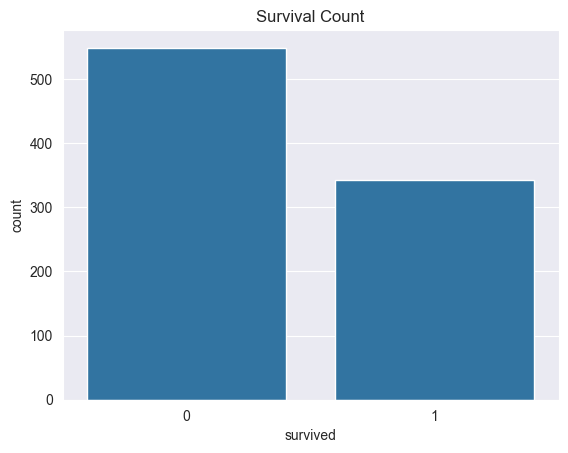

In [55]:
sns.countplot(x='survived', data=data)
plt.title('Survival Count')
plt.show()

In [56]:
survival_by_sex = data.groupby('sex')['survived'].value_counts(normalize=True).unstack()
print('Survival Ration by Sex')
print(survival_by_sex)

Survival Ration by Sex
survived         0         1
sex                         
0         0.257962  0.742038
1         0.811092  0.188908


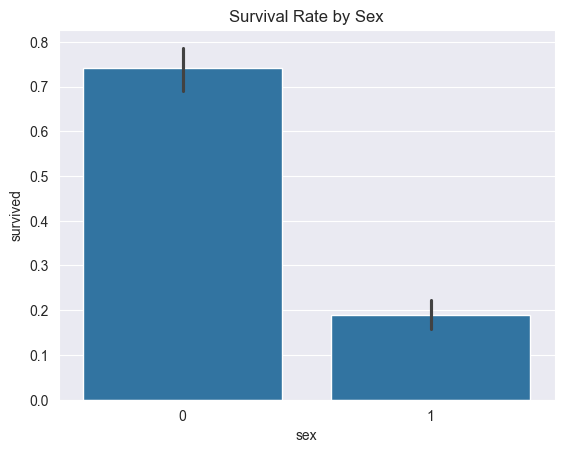

In [57]:
sns.barplot(x='sex', y = 'survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

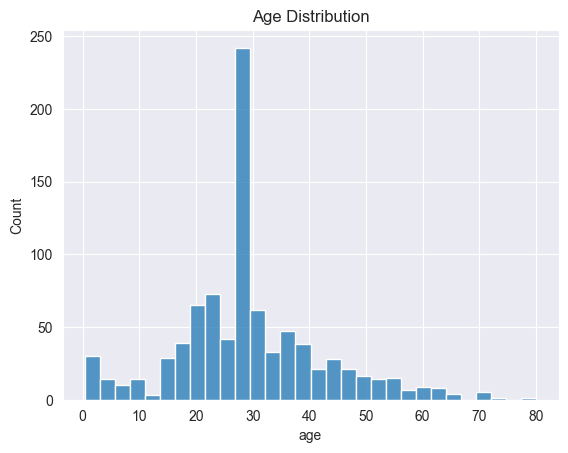

In [58]:
sns.histplot(data['age'], bins=30)
plt.title('Age Distribution')
plt.show()

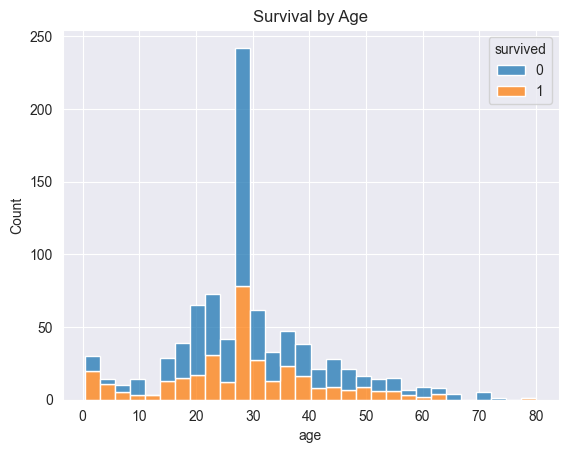

In [59]:
sns.histplot(data=data, x='age', hue='survived', multiple='stack', bins=30)
plt.title('Survival by Age')
plt.show()

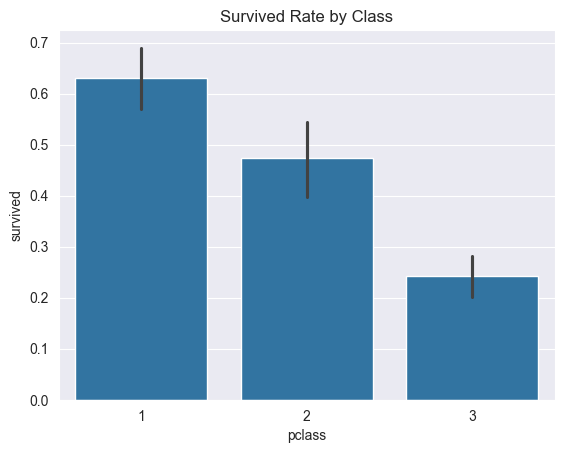

In [60]:
sns.barplot(x='pclass', y='survived', data=data)
plt.title('Survived Rate by Class')
plt.show()

In [61]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,0
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,0
4,0,3,1,35.0,0,0,8.0500,2,1


In [62]:
X = data.drop('survived', axis=1)
y = data['survived']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
print(len(X_train))

712


In [65]:
print(len(X_test))

179


In [66]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print('Scaled Training Data: ')
display(X_train_scaled.head())

print('\nScaled Test Data: ')
display(X_test_scaled.head())

Scaled Training Data: 


,pclass,sex,age,sibsp,parch,fare,embarked,alone
331,-1.614136,0.724310,1.253641,-0.470722,-0.479342,-0.078684,0.563525,0.812203
733,-0.400551,0.724310,-0.477284,-0.470722,-0.479342,-0.377145,0.563525,0.812203
382,0.813034,0.724310,0.215086,-0.470722,-0.479342,-0.474867,0.563525,0.812203
704,0.813034,0.724310,-0.246494,0.379923,-0.479342,-0.476230,0.563525,-1.231219
813,0.813034,-1.380624,-1.785093,2.931860,2.048742,-0.025249,0.563525,-1.231219



Scaled Test Data: 


,pclass,sex,age,sibsp,parch,fare,embarked,alone
709,0.813034,0.724310,-0.092634,0.379923,0.784700,-0.333901,-2.025053,-1.231219
439,-0.400551,0.724310,0.138156,-0.470722,-0.479342,-0.425284,0.563525,0.812203
840,0.813034,0.724310,-0.708074,-0.470722,-0.479342,-0.474867,0.563525,0.812203
720,-0.400551,-1.380624,-1.785093,-0.470722,0.784700,0.007966,0.563525,-1.231219
39,0.813034,-1.380624,-1.169653,0.379923,-0.479342,-0.411002,-2.025053,-1.231219


In [67]:
print('Training Data Shape:', X_train_scaled.shape)
print('Testing Data Shape:', X_test_scaled.shape)

Training Data Shape: (712, 8)
Testing Data Shape: (179, 8)


In [68]:
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [69]:
pred_log = model_log.predict(X_test_scaled)

In [70]:
pred_log = model_log.predict(X_test_scaled)

In [71]:
print(pred_log)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]


In [72]:
model_log = LogisticRegression(max_iter=200)
model_log.fit(X_train_scaled, y_train)
pred_log = model_log.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, pred_log))
print(classification_report(y_test, pred_log))

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# KNN K-Nearest Neighbours

In [73]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train_scaled, y_train)
pred_knn = model_knn.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



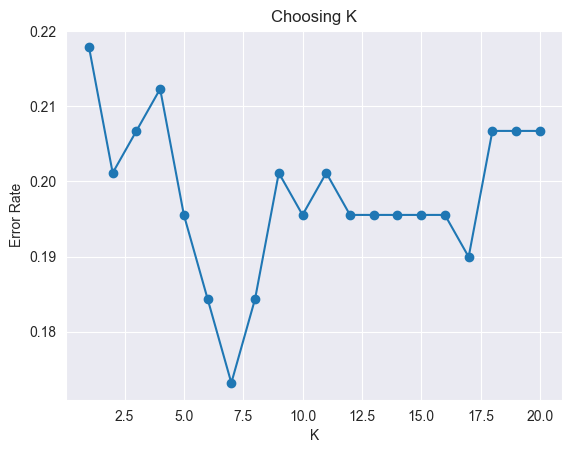

In [74]:
errors =[]
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    pred_k = knn.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

# Decision Tree Classifier

Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



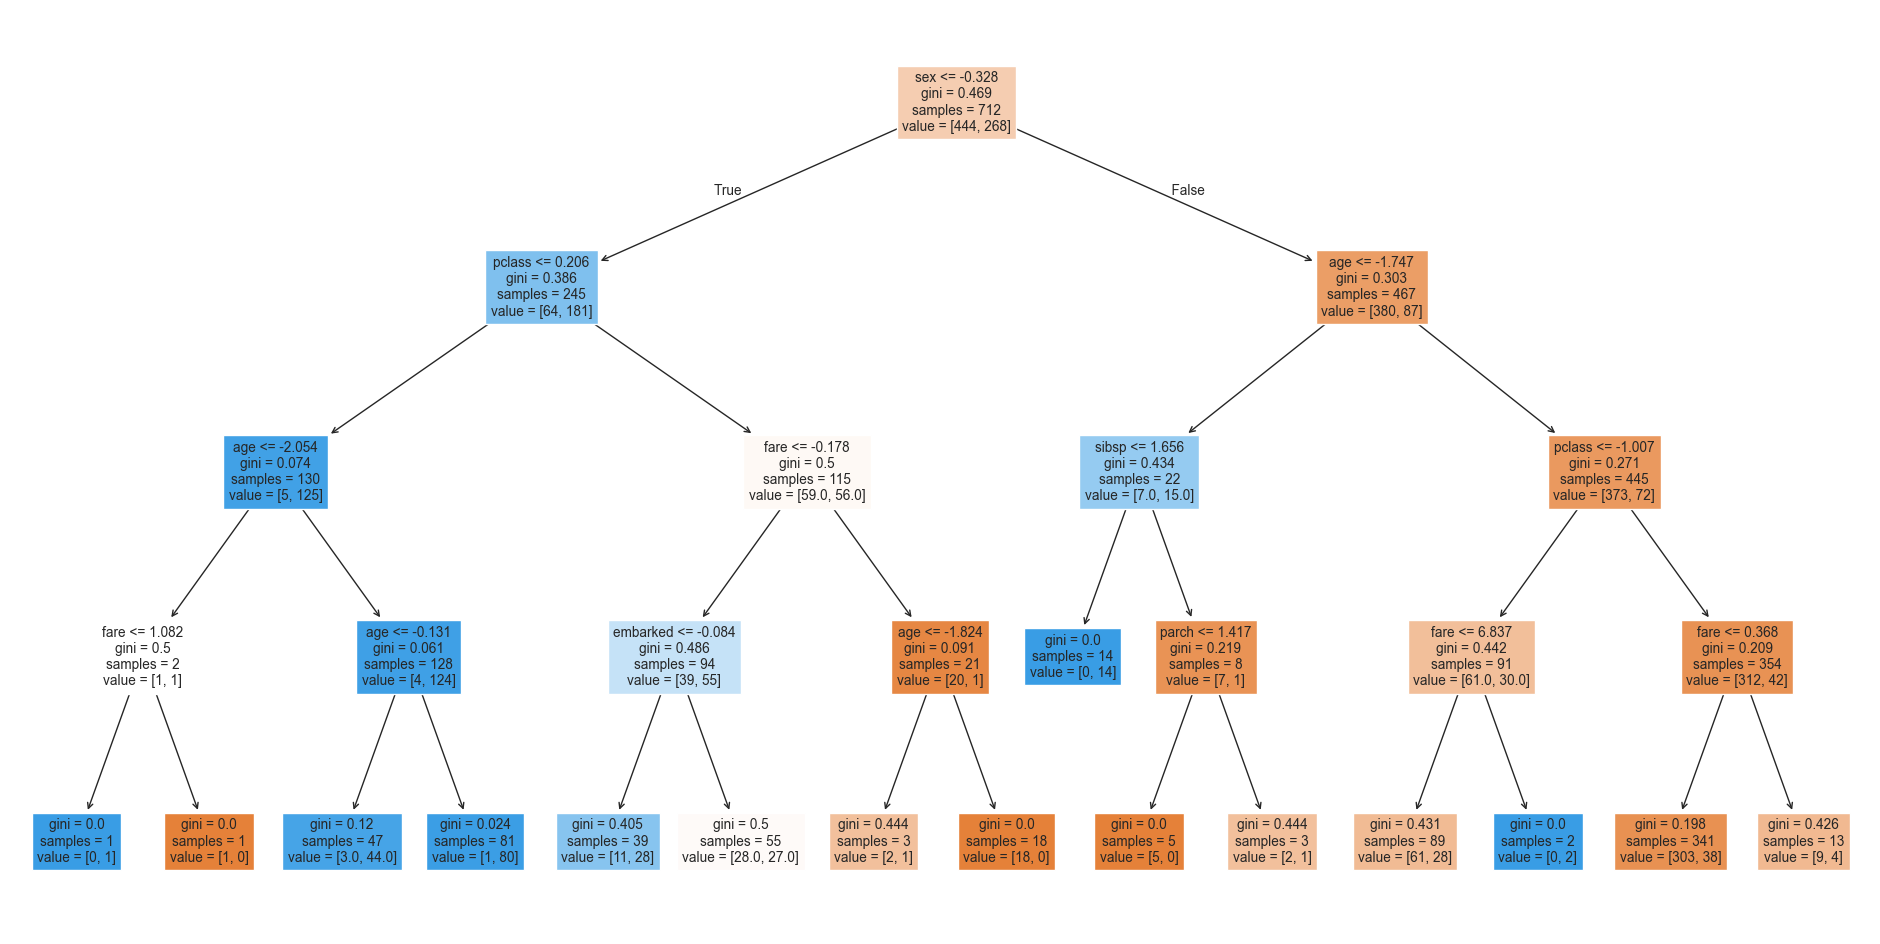

In [75]:
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train_scaled, y_train)
pred_tree = model_tree.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

plt.figure(figsize=(24,12))
plot_tree(model_tree, filled=True, feature_names=X.columns)
plt.show()

# Random Forest Classifier

In [76]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)
pred_rf = model_rf.predict(X_test_scaled)

print('Accuracy:', accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



**Titanic Dataset: Logistic Regression, KNN, Random Forest**

In [79]:
# Load dataset
data = sns.load_dataset('titanic')
data = data[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# Preprocessing
data['age']= data['age'].fillna(data['age'].median())
data['embarked'] = data['embarked'].fillna(data['embarked'].mode()[0])
data.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['embarked'] = le.fit_transform(data['embarked'])

# Train models
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}


